In [34]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split#將資料分成訓練組及測試組
import os

# %pip install 'tensorflow==1.14.0'
# %pip install keras
# %pip install 'protobuf== 3.20.0'
# %pip uninstall keras
# %pip install tensorflow

import tensorflow as tf
print("tensorflow ver: ", tf.__version__)
tf.compat.v1.disable_v2_behavior()

import keras
print("keras ver: ", keras.__version__)
from keras.models import Sequential, load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform



print("Python ver: ", sys.version)
print("numpy ver: ", np.version.version)
print("pandas ver: ", pd.__version__)
print("sklearn ver: ", sklearn.__version__)
print("matplotlib ver: ", matplotlib.__version__)

# %pip install tensorflow-gpu==1.14.0
# %pip uninstall tensorflow
# %pip install tensorflow-gpu
sess = tf.compat.v1.Session(config=tf.ConfigProto(log_device_placement=True))
# devices = sess.list_devices()
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# print("keras ver: ", keras.__version__)
tf.test.gpu_device_name()

tensorflow ver:  1.14.0
keras ver:  2.2.5
Python ver:  3.7.13 (default, Mar 29 2022, 02:18:16) 
[GCC 7.5.0]
numpy ver:  1.21.5
pandas ver:  1.3.5
sklearn ver:  1.0.2
matplotlib ver:  3.5.2


2023-03-25 12:03:21.479628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 12:03:21.479720: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3060 major: 8 minor: 6 memoryClockRate(GHz): 1.837
pciBusID: 0000:01:00.0
2023-03-25 12:03:21.479818: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory
2023-03-25 12:03:21.479847: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory
2023-03-25 12:03:21.479870: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen libra

''

In [35]:

dataframe = pd.read_csv('./df_USE_lstm_train.csv',
                         encoding = "Big5",na_filter=True).dropna()

In [36]:
dataframe

,公司碼,TSE 產業別,年月,X01_Ln資產總額,X02_流動佔總資產比率,X03_流動佔營業淨收入比率,X04_流動比率,X05_速動比率,X06_總資產週轉率,X07_現金流量比率,X08_銷貨毛利率,X09_負債權益比,X10_存貨週轉次數,X11_應收帳款週轉次數,X12_淨值佔資產比率,X13_保留盈餘對總資產比例,X14_ROE,X15_利息保障倍數,X16_稅前淨利率,X17_負債比率,X18_長期負債總比率,X19_ROA,N01_是否四大,Y_繼續經營疑慮,Lstm,Datamining
0,1101,1,200803.0,17.860166,0.300649,3.188306,191.69,149.68,0.09,8.36,13.91,0.881842,2.16,2.08,53.14,0.086722,1.67,4.31,11.31,46.86,0.311761,1.13,1,0,1,1
1,1101,1,200806.0,17.811181,0.284241,2.644814,127.04,102.02,0.11,4.89,10.66,1.057768,2.60,2.40,48.60,0.061806,2.70,5.09,10.78,51.40,0.290287,1.58,1,0,1,1
2,1101,1,200809.0,17.637446,0.247127,2.032282,115.39,81.03,0.12,16.79,9.57,1.085863,2.64,2.39,47.94,0.069877,1.48,3.34,7.04,52.06,0.306412,0.98,1,0,1,1
3,1101,1,200812.0,17.594278,0.234187,2.496075,111.71,84.44,0.09,3.01,5.35,1.070584,2.15,1.98,48.30,0.075107,0.90,2.08,4.31,51.70,0.307405,0.72,1,0,1,1
4,1101,1,200903.0,17.697198,0.251429,2.684157,125.29,96.44,0.10,7.61,9.73,1.075014,2.62,2.03,48.19,0.073696,0.53,1.81,2.76,51.81,0.317400,0.50,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46704,9962,10,201612.0,13.596558,0.713315,1.300904,628.99,132.60,0.56,-27.24,8.55,0.151827,0.97,6.03,86.82,0.061342,3.17,407.33,5.92,13.18,0.018407,2.79,0,0,1,1
46705,9962,10,201703.0,13.634926,0.734175,1.263158,870.96,203.10,0.58,68.72,10.27,0.114064,0.95,7.99,89.76,0.096990,4.12,271.80,7.50,10.24,0.018091,3.65,0,0,1,1
46706,9962,10,201706.0,13.678957,0.748912,1.573833,466.70,105.00,0.48,35.69,0.69,0.216720,0.85,9.23,82.19,0.040200,-0.94,-150.78,-2.03,17.81,0.017651,-0.80,0,0,2,1
46707,9962,10,201709.0,13.564384,0.719438,1.428747,805.51,219.06,0.48,76.82,4.04,0.121574,0.85,8.85,89.16,0.050125,0.77,76.93,1.60,10.84,0.019082,0.67,0,0,2,1


In [37]:
#########################驗證集

In [38]:
dataframe_va = pd.read_csv('df_USE_final_Verification.csv',
                         encoding = "Big5",na_filter=True).dropna()

In [39]:
dataframe_va

,公司碼,TSE 產業別,年月,X01_Ln資產總額,X02_流動佔總資產比率,X03_流動佔營業淨收入比率,X04_流動比率,X05_速動比率,X06_總資產週轉率,X07_現金流量比率,X08_銷貨毛利率,X09_負債權益比,X10_存貨週轉次數,X11_應收帳款週轉次數,X12_淨值佔資產比率,X13_保留盈餘對總資產比例,X14_ROE,X15_利息保障倍數,X16_稅前淨利率,X17_負債比率,X18_長期負債總比率,X19_ROA,N01_是否四大,Y_繼續經營疑慮,Lstm,Datamining
0,1101,1,201606.0,18.103430,0.270911,3.173845,123.71,100.21,0.08,7.07,22.06,0.831248,2.13,1.42,54.61,0.159564,1.80,8.44,15.12,45.39,0.234942,1.13,1,0,1,0
1,1101,1,201609.0,18.121981,0.279835,3.318928,119.67,98.22,0.08,6.67,22.19,0.822369,2.10,1.31,54.87,0.170548,2.25,9.58,18.01,45.13,0.217432,1.38,1,0,1,0
2,1101,1,201612.0,18.170731,0.291713,2.933705,141.34,117.50,0.10,8.79,24.01,0.811362,2.36,1.44,55.21,0.177302,1.88,8.86,14.10,44.79,0.241535,1.18,1,0,1,0
3,1101,1,201703.0,18.154634,0.295286,3.618564,137.38,113.58,0.08,2.52,14.16,0.759056,2.08,1.07,56.85,0.185593,0.79,4.39,7.91,43.15,0.216570,0.60,1,0,1,0
4,1101,1,201706.0,18.189165,0.302622,3.210033,124.27,102.72,0.09,5.03,21.32,0.803401,2.16,1.23,55.45,0.171526,2.10,10.07,16.50,44.55,0.201971,1.32,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25624,9962,10,201912.0,13.840774,0.790439,1.616775,317.65,88.44,0.51,-27.40,5.32,0.360873,0.86,5.19,73.48,0.033243,1.20,30.05,2.25,26.52,0.016335,0.94,0,0,1,0
25625,9962,10,202003.0,13.768097,0.749678,1.715698,294.57,68.53,0.43,41.16,-0.11,0.361262,0.77,5.05,73.46,0.023246,-1.44,-25.54,-3.04,26.54,0.010890,-1.02,0,0,1,0
25626,9962,10,202006.0,13.737739,0.756063,1.511503,321.67,81.65,0.49,-11.41,2.38,0.327109,0.86,7.76,75.35,0.010094,-0.10,-1.27,-0.19,24.65,0.011438,-0.04,0,0,2,0
25627,9962,10,202009.0,13.515239,0.705862,1.702834,673.77,162.80,0.38,132.34,4.21,0.133849,0.68,6.94,88.20,0.015706,0.40,18.56,1.08,11.80,0.013286,0.35,0,0,2,0


In [40]:
print(dataframe_va.shape)

dataframe_va=dataframe_va.drop(['TSE 產業別','Lstm','Datamining'], axis=1)#刪除非必要欄位

total_va = dataframe_va.shape  #資料總變數與總資料筆數
total_class_va = dataframe_va.Y_繼續經營疑慮.value_counts()
print(total_va)
print(total_class_va)

(25629, 26)
(25629, 23)
0    25476
1      153
Name: Y_繼續經營疑慮, dtype: int64


In [41]:
#lstm T+4
   
X_va_lstm_4 = []
Y_va_lstm_4 = []
j_va_lstm_4 = 0
for j in range(len(dataframe_va)-7):
    if dataframe_va.iloc[j,0] == dataframe_va.iloc[j+7,0]:  
        X_va_lstm_4.append(dataframe_va.iloc[j:j+4,2:22].values)  #scaled_dataset_
        Y_va_lstm_4.append(dataframe_va.iloc[j+7,22])
    j_va_lstm_4 += 1

X_va_lstm_4 =np.array(X_va_lstm_4)
Y_va_lstm_4 =np.array(Y_va_lstm_4)
print(X_va_lstm_4.shape)
print(Y_va_lstm_4.shape)

(14159, 4, 20)
(14159,)


In [42]:
dataframe_va['年月']=dataframe_va['年月'].astype(str)

open_day='201609'
close_day='202101'
con1_1=dataframe_va['年月']>=open_day
con2_2=dataframe_va['年月']<=close_day
dataframe_va_3=dataframe_va[con1_1&con2_2]
dataframe_va_3.shape

(24348, 23)

In [43]:
#lstm T+3
   
X_va_lstm_3 = []
Y_va_lstm_3 = []
j_va_lstm_3 = 0
for j in range(len(dataframe_va_3)-6):
    if dataframe_va_3.iloc[j,0] == dataframe_va_3.iloc[j+6,0]:  
        X_va_lstm_3.append(dataframe_va_3.iloc[j:j+4,2:22].values)  #scaled_dataset_
        Y_va_lstm_3.append(dataframe_va_3.iloc[j+6,22])
    j_va_lstm_3 += 1

X_va_lstm_3 =np.array(X_va_lstm_3)
Y_va_lstm_3 =np.array(Y_va_lstm_3)
print(X_va_lstm_3.shape)
print(Y_va_lstm_3.shape)

(14466, 4, 20)
(14466,)


In [44]:
dataframe_va['年月']=dataframe_va['年月'].astype(str)

open_day='201612'
close_day='202101'
con1_1=dataframe_va['年月']>=open_day
con2_2=dataframe_va['年月']<=close_day
dataframe_va_2=dataframe_va[con1_1&con2_2]
dataframe_va_2.shape

(23198, 23)

In [45]:
#lstm T+2
   
X_va_lstm_2 = []
Y_va_lstm_2 = []
j_va_lstm_2 = 0
for j in range(len(dataframe_va_2)-5):
    if dataframe_va_2.iloc[j,0] == dataframe_va_2.iloc[j+5,0]:  
        X_va_lstm_2.append(dataframe_va_2.iloc[j:j+4,2:22].values)  #scaled_dataset_
        Y_va_lstm_2.append(dataframe_va_2.iloc[j+5,22])
    j_va_lstm_2 += 1

X_va_lstm_2 =np.array(X_va_lstm_2)
Y_va_lstm_2 =np.array(Y_va_lstm_2)
print(X_va_lstm_2.shape)
print(Y_va_lstm_2.shape)

(14915, 4, 20)
(14915,)


In [46]:
dataframe_va['年月']=dataframe_va['年月'].astype(str)

open_day='201703'
close_day='202101'
con1_1=dataframe_va['年月']>=open_day
con2_2=dataframe_va['年月']<=close_day
dataframe_va_1=dataframe_va[con1_1&con2_2]
dataframe_va_1.shape

(21827, 23)

In [47]:
#lstm T+1
   
X_va_lstm_1 = []
Y_va_lstm_1 = []
j_va_lstm_1 = 0
for j in range(len(dataframe_va_1)-4):
    if dataframe_va_1.iloc[j,0] == dataframe_va_1.iloc[j+4,0]:  
        X_va_lstm_1.append(dataframe_va_1.iloc[j:j+4,2:22].values)  #scaled_dataset_
        Y_va_lstm_1.append(dataframe_va_1.iloc[j+4,22])
    j_va_lstm_1 += 1

X_va_lstm_1 =np.array(X_va_lstm_1)
Y_va_lstm_1 =np.array(Y_va_lstm_1)
print(X_va_lstm_1.shape)
print(Y_va_lstm_1.shape)

(15193, 4, 20)
(15193,)


In [48]:
dataframe_va['年月']=dataframe_va['年月'].astype(str)

open_day='201706'
close_day='202101'
con1_1=dataframe_va['年月']>=open_day
con2_2=dataframe_va['年月']<=close_day
dataframe_va_0=dataframe_va[con1_1&con2_2]
dataframe_va_0.shape

(20656, 23)

In [49]:
#lstm T
   
X_va_lstm_ = []
Y_va_lstm_ = []
j_va_lstm_ = 0
for j in range(len(dataframe_va_0)-3):
    if dataframe_va_0.iloc[j,0] == dataframe_va_0.iloc[j+3,0]:  
        X_va_lstm_.append(dataframe_va_0.iloc[j:j+4,2:22].values)  #scaled_dataset_
        Y_va_lstm_.append(dataframe_va_0.iloc[j+3,22])
    j_va_lstm_ += 1

X_va_lstm_ =np.array(X_va_lstm_)
Y_va_lstm_ =np.array(Y_va_lstm_)
print(X_va_lstm_.shape)
print(Y_va_lstm_.shape)

(15681, 4, 20)
(15681,)


In [50]:
##################################END 驗證集

In [51]:
print(dataframe.shape)

dataframe=dataframe.drop(['TSE 產業別','Lstm','Datamining'], axis=1)#刪除非必要欄位

total = dataframe.shape  #資料總變數與總資料筆數
total_class = dataframe.Y_繼續經營疑慮.value_counts()
print(total)
print(total_class)

(46709, 26)
(46709, 23)
0    46111
1      598
Name: Y_繼續經營疑慮, dtype: int64


In [52]:
pd.set_option('display.max_columns', None)
dataframe.describe()

,公司碼,年月,X01_Ln資產總額,X02_流動佔總資產比率,X03_流動佔營業淨收入比率,X04_流動比率,X05_速動比率,X06_總資產週轉率,X07_現金流量比率,X08_銷貨毛利率,X09_負債權益比,X10_存貨週轉次數,X11_應收帳款週轉次數,X12_淨值佔資產比率,X13_保留盈餘對總資產比例,X14_ROE,X15_利息保障倍數,X16_稅前淨利率,X17_負債比率,X18_長期負債總比率,X19_ROA,N01_是否四大,Y_繼續經營疑慮
count,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,4.670900e+04,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000
mean,4190.379520,201275.857907,14.843288,0.594193,32.624221,250.970424,169.394443,0.253485,7.740377,21.011511,1.075441,16.689591,15.377842,57.183854,0.113850,1.815703,8.883992e+02,-22.034004,42.816146,0.103589,1.207438,0.879809,0.012803
std,2303.639462,284.957147,1.418051,0.202376,1977.043693,633.960245,409.724750,0.199360,78.572711,273.769772,4.713158,1007.823544,973.436881,16.260036,0.413443,14.142130,2.114723e+04,1315.850408,16.260036,0.107288,3.563543,0.325188,0.112423
min,1101.000000,200803.000000,8.608313,0.007005,0.098168,0.810000,0.020000,0.000000,-11155.200000,-19775.160000,0.005666,-10.650000,0.000000,0.170000,-38.510625,-2215.580000,-2.485306e+06,-150190.000000,0.560000,0.000000,-431.410000,0.000000,0.000000
25%,2396.000000,201012.000000,13.874244,0.457896,1.909710,139.670000,80.160000,0.140000,-1.280000,11.180000,0.450792,0.760000,0.960000,45.910000,0.052018,0.230000,2.240000e+00,1.000000,31.070000,0.024044,0.230000,1.000000,0.000000
50%,3501.000000,201306.000000,14.678191,0.606752,2.631614,181.610000,118.840000,0.210000,5.830000,19.250000,0.745364,1.310000,1.390000,57.290000,0.117626,1.910000,1.449000e+01,5.690000,42.710000,0.069857,1.140000,1.000000,0.000000
75%,6105.000000,201509.000000,15.635702,0.744009,3.734403,255.200000,178.660000,0.310000,15.210000,30.090000,1.177941,2.170000,2.200000,68.930000,0.203391,3.920000,6.143000e+01,12.340000,54.090000,0.153558,2.270000,1.000000,0.000000
max,9962.000000,201712.000000,21.733461,0.999645,339244.100000,55079.490000,26744.130000,4.460000,3261.760000,52580.000000,593.802050,173462.000000,141607.000000,99.440000,0.750217,817.740000,2.629103e+06,44890.830000,99.830000,0.957482,92.750000,1.000000,1.000000


In [53]:
#建立公司名單集合
Name = []
i = 0
for i in range(len(dataframe)):
    Name.append(dataframe.iloc[i,0])
    i += 1
print(len(Name))
print(type(Name))
Nameset = set(Name)
print(len(Nameset))

46709
<class 'list'>
1724


In [54]:
# window 建立四期觀測資料集
X = []
Y = []
j = 0
for j in range(len(dataframe)-3):
    if dataframe.iloc[j,0] == dataframe.iloc[j+3,0]:  
        X.append(dataframe.iloc[j:j+4,2:22].values)  #scaled_dataset_
        Y.append(dataframe.iloc[j+3,22])
    j += 1
X =np.array(X)
Y =np.array(Y)
print(X.shape)
print(Y.shape)

(41537, 4, 20)
(41537,)


In [55]:
Y_c =pd.DataFrame(Y)
total_class_c = Y_c.value_counts()
print(total_class_c)

0    41105
1      432
dtype: int64


In [56]:
print(j, len(X), len(Y))
print(type(X))

46706 41537 41537
<class 'numpy.ndarray'>


In [57]:
# np.set_printoptions(threshold=np.inf)
# Y

In [58]:
#將資料打散，而非照日期排序

def shuffle(X,Y):
  np.random.seed(10)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]

In [59]:
#將Training Data取一部份當作Test Data
def splitData(X,Y,rate):
  x_train = X[int(X.shape[0]*rate):]
  y_train = Y[int(Y.shape[0]*rate):]
  x_test = X[:int(X.shape[0]*rate)]
  y_test = Y[:int(Y.shape[0]*rate)]
  return x_train, y_train, x_test, y_test

In [60]:

# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X, Y)

# split training data and validation data
x_train, y_train, x_test, y_test = splitData(X_train, Y_train, 0.2)

print("資料型別",type(x_train))      #列印陣列資料型別
print("陣列元素資料型別：",x_train.dtype) #列印陣列元素資料型別
print("陣列元素總數：",x_train.size)   #列印陣列尺寸，即陣列元素總數
print("陣列形狀：",x_train.shape)     #列印陣列形狀
print("陣列的維度數目",x_train.ndim)   #列印陣列的維度數目
print("資料型別",type(y_train))      #列印陣列資料型別
print("陣列元素資料型別：",y_train.dtype) #列印陣列元素資料型別
print("陣列元素總數：",y_train.size)   #列印陣列尺寸，即陣列元素總數
print("陣列形狀：",y_train.shape)     #列印陣列形狀
print("陣列的維度數目",y_train.ndim)   #列印陣列的維度數目
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

資料型別 <class 'numpy.ndarray'>
陣列元素資料型別： float64
陣列元素總數： 2658400
陣列形狀： (33230, 4, 20)
陣列的維度數目 3
資料型別 <class 'numpy.ndarray'>
陣列元素資料型別： int64
陣列元素總數： 33230
陣列形狀： (33230,)
陣列的維度數目 1


In [61]:
from keras import Sequential
from keras.constraints import MaxNorm as maxnorm
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(64, activation='sigmoid', input_shape=(4, 20)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='sigmoid'))
model.add(Dropout(0.1))


model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy'
              ,optimizer='Adam'
              ,metrics=['accuracy'])

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                21760     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
______________________________________

In [62]:

batch_size = 2000
epochs = 1500

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'LSTM_trained_model.h5'

# Use ModelCheckpoint to save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss' , save_best_only=True, verbose=1)

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=200, verbose=1)


cw = {0:1 , 1:100}
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data= (x_test, y_test),
                    class_weight=cw,callbacks=[earlystop, checkpoint])


# loading our save model
print("Loading trained model")
model = load_model(model_path)

model.save('lstm_model_n-s.h5')
# score, acc = model.evaluate(x_test, y_test)

Train on 33230 samples, validate on 8307 samples
Epoch 1/1500


2023-03-25 12:03:39.744176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 12:03:39.744282: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3060 major: 8 minor: 6 memoryClockRate(GHz): 1.837
pciBusID: 0000:01:00.0
2023-03-25 12:03:39.744357: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory
2023-03-25 12:03:39.744383: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory
2023-03-25 12:03:39.744404: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen libra

33230/33230 [==============================] - 1s 20us/step - loss: 1.4734 - acc: 0.9387 - val_loss: 0.4968 - val_acc: 0.9882

Epoch 00001: val_loss improved from inf to 0.49681, saving model to /home/kiwi/Downloads/畢業靠二姊-20230319T142631Z-001/畢業靠二姊/saved_models/LSTM_trained_model.h5
Epoch 2/1500
33230/33230 [==============================] - 0s 5us/step - loss: 1.3510 - acc: 0.8630 - val_loss: 0.5650 - val_acc: 0.9902

Epoch 00002: val_loss did not improve from 0.49681
Epoch 3/1500
33230/33230 [==============================] - 0s 5us/step - loss: 1.2956 - acc: 0.8029 - val_loss: 0.5781 - val_acc: 0.9329

Epoch 00003: val_loss did not improve from 0.49681
Epoch 4/1500
33230/33230 [==============================] - 0s 6us/step - loss: 1.2296 - acc: 0.7739 - val_loss: 0.5616 - val_acc: 0.9050

Epoch 00004: val_loss did not improve from 0.49681
Epoch 5/1500
33230/33230 [==============================] - 0s 5us/step - loss: 1.1392 - acc: 0.8117 - val_loss: 0.5050 - val_acc: 0.9198

Epoch 0

In [63]:
#在訓練集結果
y_train_predict=model.predict(x_train)
y_train_predict=y_train_predict[:,0]
y_train_predict=[np.around(i) for i in y_train_predict]
y_train_predict=np.array(y_train_predict)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(y_train,y_train_predict))
print("混淆矩陣：")
print(metrics.confusion_matrix(y_train,y_train_predict))

精準度指標：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32896
           1       0.77      0.99      0.87       334

    accuracy                           1.00     33230
   macro avg       0.89      1.00      0.93     33230
weighted avg       1.00      1.00      1.00     33230

混淆矩陣：
[[32799    97]
 [    2   332]]


In [64]:
#在測試集結果
y_test_predict=model.predict(x_test)
y_test_predict=y_test_predict[:,0]
y_test_predict=[np.around(i) for i in y_test_predict]
y_test_predict=np.array(y_test_predict)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(y_test,y_test_predict))
print("混淆矩陣：")
print(metrics.confusion_matrix(y_test,y_test_predict))

精準度指標：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8209
           1       0.73      0.98      0.84        98

    accuracy                           1.00      8307
   macro avg       0.87      0.99      0.92      8307
weighted avg       1.00      1.00      1.00      8307

混淆矩陣：
[[8174   35]
 [   2   96]]


In [65]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

precision = precision_score(y_test,y_test_predict)
recall = recall_score(y_test,y_test_predict)
f1 = f1_score(y_test,y_test_predict)
roc_auc_score = roc_auc_score(y_test,y_test_predict)
print(precision)
print(recall)
print(f1)
print(roc_auc_score)

0.732824427480916
0.9795918367346939
0.8384279475982532
0.9876641118135645


In [66]:
###################驗證組


In [67]:
from keras.models import load_model
# load model from single file
model = load_model('lstm_model_n-s.h5')
# model = load_model('lstm_model7.h5')

In [68]:
# t=0
Y_va_predict_0=model.predict(X_va_lstm_)
Y_va_predict_0=Y_va_predict_0[:,0]
Y_va_predict_0=[np.around(i) for i in Y_va_predict_0]
Y_va_predict_0=np.array(Y_va_predict_0)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(Y_va_lstm_,Y_va_predict_0))
print("混淆矩陣：")
print(metrics.confusion_matrix(Y_va_lstm_,Y_va_predict_0))

精準度指標：
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15605
           1       0.36      0.84      0.50        76

    accuracy                           0.99     15681
   macro avg       0.68      0.92      0.75     15681
weighted avg       1.00      0.99      0.99     15681

混淆矩陣：
[[15491   114]
 [   12    64]]


In [69]:
# t=1
Y_va_predict_1=model.predict(X_va_lstm_1)
Y_va_predict_1=Y_va_predict_1[:,0]
Y_va_predict_1=[np.around(i) for i in Y_va_predict_1]
Y_va_predict_1=np.array(Y_va_predict_1)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(Y_va_lstm_1,Y_va_predict_1))
print("混淆矩陣：")
print(metrics.confusion_matrix(Y_va_lstm_1,Y_va_predict_1))

精準度指標：
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15127
           1       0.33      0.79      0.46        66

    accuracy                           0.99     15193
   macro avg       0.66      0.89      0.73     15193
weighted avg       1.00      0.99      0.99     15193

混淆矩陣：
[[15021   106]
 [   14    52]]


In [70]:
# t=2
Y_va_predict_2=model.predict(X_va_lstm_2)
Y_va_predict_2=Y_va_predict_2[:,0]
Y_va_predict_2=[np.around(i) for i in Y_va_predict_2]
Y_va_predict_2=np.array(Y_va_predict_2)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(Y_va_lstm_2,Y_va_predict_2))
print("混淆矩陣：")
print(metrics.confusion_matrix(Y_va_lstm_2,Y_va_predict_2))

精準度指標：
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14858
           1       0.31      0.77      0.45        57

    accuracy                           0.99     14915
   macro avg       0.66      0.88      0.72     14915
weighted avg       1.00      0.99      0.99     14915

混淆矩陣：
[[14762    96]
 [   13    44]]


In [71]:
# t=3
Y_va_predict_3=model.predict(X_va_lstm_3)
Y_va_predict_3=Y_va_predict_3[:,0]
Y_va_predict_3=[np.around(i) for i in Y_va_predict_3]
Y_va_predict_3=np.array(Y_va_predict_3)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(Y_va_lstm_3,Y_va_predict_3))
print("混淆矩陣：")
print(metrics.confusion_matrix(Y_va_lstm_3,Y_va_predict_3))

精準度指標：
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14415
           1       0.31      0.76      0.44        51

    accuracy                           0.99     14466
   macro avg       0.65      0.88      0.72     14466
weighted avg       1.00      0.99      0.99     14466

混淆矩陣：
[[14327    88]
 [   12    39]]


In [72]:
# t=4
Y_va_predict_4=model.predict(X_va_lstm_4)
Y_va_predict_4=Y_va_predict_4[:,0]
Y_va_predict_4=[np.around(i) for i in Y_va_predict_4]
Y_va_predict_4=np.array(Y_va_predict_4)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(Y_va_lstm_4,Y_va_predict_4))
print("混淆矩陣：")
print(metrics.confusion_matrix(Y_va_lstm_4,Y_va_predict_4))

精準度指標：
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14112
           1       0.32      0.77      0.45        47

    accuracy                           0.99     14159
   macro avg       0.66      0.88      0.72     14159
weighted avg       1.00      0.99      1.00     14159

混淆矩陣：
[[14034    78]
 [   11    36]]


In [73]:
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(Y_va_lstm,Y_va_predict_0)
# precision = precision_score(Y_va_lstm,Y_va_predict_0)
# recall = recall_score(Y_va_lstm,Y_va_predict_0)
# f1 = f1_score(Y_va_lstm,Y_va_predict_0)
# roc_auc = roc_auc_score(Y_va_lstm,Y_va_predict_0)

# print(accuracy)
# print(precision)
# print(recall)
# print(f1)
# print(roc_auc)

In [74]:
# y_predict

In [75]:
# y_va_predict=model.predict(X_va)
# y_va_predict=y_va_predict[:,0]
# y_va_predict=[int(i) for i in y_va_predict]
# y_va_predict=np.array(y_va_predict)
# from sklearn import metrics
# print("精準度指標：")
# print(metrics.classification_report(Y_va,y_va_predict))
# print("混淆矩陣：")
# print(metrics.confusion_matrix(Y_va,y_va_predict))

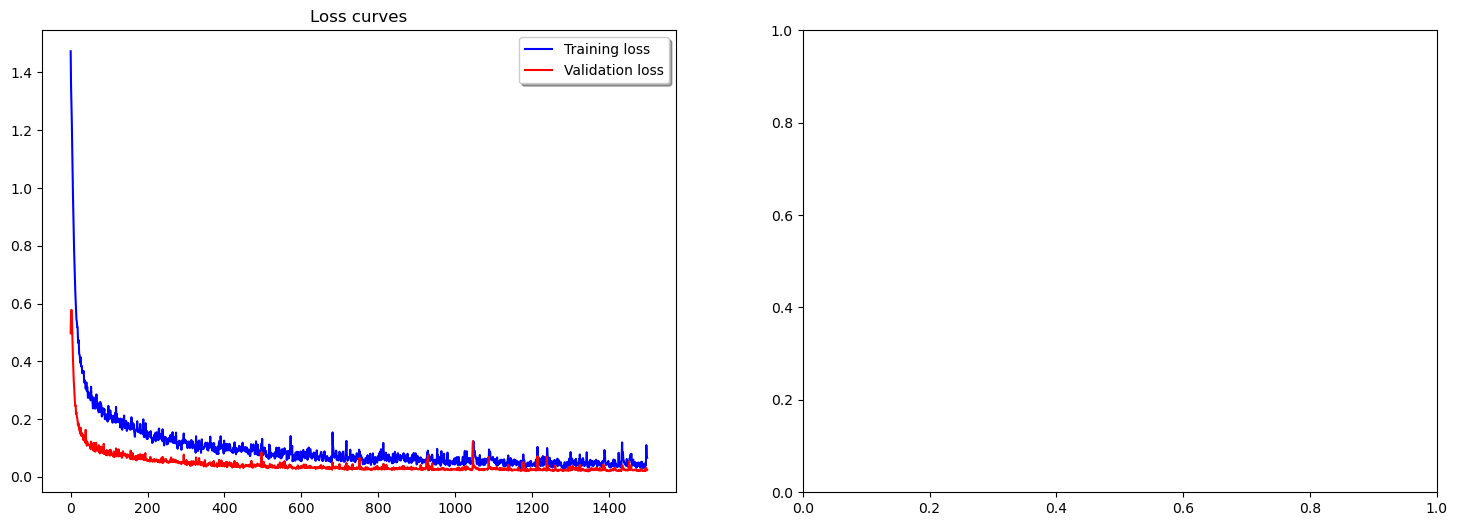

In [76]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(history.history['loss'], color='b', label='Training loss')
axs[0].plot(history.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)

if 'accuracy' in history.history:
    axs[1].plot(history.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)

In [77]:
import shap
    
model = load_model(model_path)
# Initialize variables
sess = tf.compat.v1.keras.backend.get_session()
init_op = tf.compat.v1.global_variables_initializer()
sess.run(init_op)


2023-03-25 12:08:23.420328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 12:08:23.420448: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3060 major: 8 minor: 6 memoryClockRate(GHz): 1.837
pciBusID: 0000:01:00.0
2023-03-25 12:08:23.420555: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory
2023-03-25 12:08:23.420603: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory
2023-03-25 12:08:23.420645: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen libra

In [78]:

# Use the training data for deep explainer => can use fewer instances
explainer = shap.DeepExplainer(model, x_train)

keras is no longer supported, please use tf.keras instead.
You have provided over 5k background samples! For better performance consider using smaller random sample.


In [82]:

# explain the the testing instances (can use fewer instanaces)
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(x_test)
print(f'length of SHAP values: {len(shap_values)}')

length of SHAP values: 1


In [84]:

# init the JS visualization code
shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], dataframe)
# shap.force_plot(explainer.expected_value, shap_values.values, x_test)

In [197]:
# shap.summary_plot(shap_values, x_test)
# print(explainer.expected_value)
# print(len(shap_values))
# print(len(shap_values[0]))
# print(len(shap_values[0][0]))
# print(len(dataframe_va.values))
# print(len(dataframe_va.values[0]))
# print(dataframe_va.values[0])
# print(dataframe_va.values)
# total_va = dataframe_va.shape  #資料總變數與總資料筆數
# print(total_va)

shap.force_plot(explainer.expected_value[0], shap_values[0][0], dataframe_va.values)

# print(X_va_lstm_.shape)

# print('x_test: ')
# print(x_test)

# print('y_test: ')
# print(y_test)
# shap_values_array = shap_values[0][0][0].reshape(1, -1)

# print(shap_values[0][0][0])


IndexError: index 17 is out of bounds for axis 0 with size 4

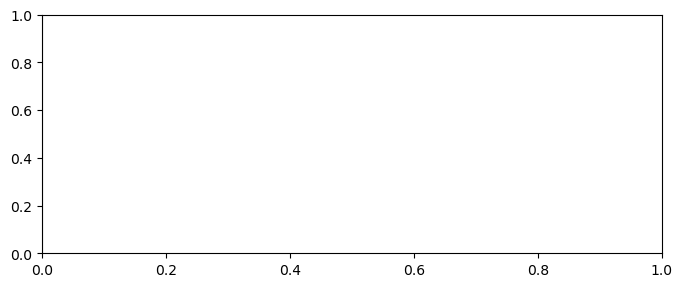

In [232]:
# summary_plot
shap.summary_plot(shap_values, x_test)

In [224]:
# bar
shap.plots.bar(shap_values[0][0][0])
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], dataframe_va.values)

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!

In [223]:
# waterfall
shap.plots.waterfall(shap_values[0][0][0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [222]:
# scatter
shap.plots.scatter(shap_values[0][0][0])

AssertionError: The shap_values paramemter must be a shap.Explanation object!

In [233]:
print(explainer.expected_value)

[0.5652603]


In [ ]:
################################

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error

# # ＃生成LSTM网络
# model = Sequential() 
# model.add(LSTM(8,input_shape =(4,20)))
# model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_train,y_train,epochs = 5,batch_size = 100,verbose = 2)
 
# # ＃生成预测
# trainpred = model.predict(x_train)

# print(trainpred)
 
# # ＃将标准化后的数据转换为原始数据
# scaler = StandardScaler().fit(trainpred)

# print(scaler)
# trainpred = scaler.inverse_transform(trainpred)
 
# # ＃计算 RMSE
# trainScore = math.sqrt(mean_squared_error(y_train [0],trainpred [:,0]))
 
# # ＃训练预测
# trainpredPlot = np.empty_like(dataset)
 
# # ＃测试预测
 
# # ＃绘制所有预测
# inversetransform= plt.plot(scaler.inverse_transform(dataset))

#If you want to positive predict value, you use tail number like 6427 ~ 3400

In [ ]:
 # 將資料組成變好看一點
# x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))
# x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

In [ ]:
print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (33230, 4, 20)
y_train size: (33230,)
X_test size: (8307, 4, 20)
y_test size: (8307,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential  #打開空白的網路神經網路機

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM


model = Sequential() 
# model.add(Dense(8, input_shape=(x_train.shape[0], x_train.shape[1])))

model.add(LSTM(8, input_shape=(1,23),activation="relu",return_sequences=True)) 
# model.add(LSTM(84, return_sequences= True)) 
# model.add(Dropout(0.2))
model.add(LSTM(8,activation="sigmoid"))
model.add(Dropout(0.5)) # Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
# from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy']) 
#以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)
model.summary()

#3*(32+1)
# model = Sequential()model.add(TimeDistributed(Dense(8), input_shape=(10, 16)))
# 输出还是10个向量，但是输出的维度由16变成了8，也就是（32,10,8）
#batch_size: 批尺寸，一次喂给lstm的数据量
#time_size: 时间步长，序列数据的长度
#feature_size: 特征维度，每个时间点输入数据的维度

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 1, 8)              1024      
                                                                 
 lstm_27 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size,validation_data= (x_test, y_test),verbose=2)
# score, acc = model.evaluate(x_test, y_test)



In [ ]:
###測試資料

In [ ]:
import numpy 
import random
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
df = pd.DataFrame({'N' : ['a', 'a', 'a','a','a','b','b','b','b','b','b','c','c','c','c','c','c','c','c','d','d','d','d','d','e','e','e','e'],
                   'year':['200903','200906','200909','200912','201003','200903','200906','200909','200912','201003','201006',
                           '200903','200906','200909','200912','201003','201006','201009','200812','200903','200906','200909',
                           '200912','201003','201012','200903','200906','200909'],
                   'Y' : [1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1]})
df

,N,year,Y
0,a,200903,1
1,a,200906,1
2,a,200909,1
3,a,200912,0
4,a,201003,1
5,b,200903,1
6,b,200906,1
7,b,200909,1
8,b,200912,1
9,b,201003,1


In [ ]:
x = 4
n = 1
o = 0
t = 0
tt = 0

df["L"]=0
df["D"]=0
for name, group in df.groupby('N'):      
    if(numpy.any(group['Y']!= 0) ):
        if(len(group)-(x-1)<0):
            group ["L"]=0
        else:
            
            for i in range(t,t+len(group)-x+1):    
                if (numpy.all(group[i-t:i+n-t]['Y']==1)):
                    group.at [i,"L"]=1
                else:
                    group.at [i,"L"]=0                         
    else:

        if(len(group)-(x-1)<0):
            group ["L"]= 0
        else:
            for i in range(t,t+len(group)-x+1):    
                if (numpy.all(group[i-t:i+x-t]['Y']==0)):
                    group.at [i,"L"]= 1
                else:
                    group.at [i,"L"]= 0    
    df[t:t+len(group)]=group[:len(group)]        
    t+=len(group)

for name, group in df.groupby('N'):
    for d in range(len(group)):
        va_a = group.Y[d:d+1]
        if va_a.loc[d+o] == 1 or 2:
#             print(d+3)
#             print(group)
            if d+3 < len(group):
                for j in range(d+1,d+4):
                    va_l = group.L[j:j+1]
#                     print(j+t)
                    if va_l.loc[j+o] == 0:
                        group.at [j+o,"L"]= 2
    df[o:o+len(group)]=group[:len(group)] 
    o = o+len(group) 
    
print (df)       

#     print(t+=len(group))
    
    


    N    year  Y  L  D
0   a  200903  1  1  0
1   a  200906  1  1  0
2   a  200909  1  2  0
3   a  200912  0  2  0
4   a  201003  1  2  0
5   b  200903  1  1  0
6   b  200906  1  1  0
7   b  200909  1  1  0
8   b  200912  1  2  0
9   b  201003  1  2  0
10  b  201006  1  2  0
11  c  200903  0  0  0
12  c  200906  1  1  0
13  c  200909  0  2  0
14  c  200912  0  2  0
15  c  201003  1  1  0
16  c  201006  1  2  0
17  c  201009  1  2  0
18  c  200812  0  2  0
19  d  200903  0  1  0
20  d  200906  0  1  0
21  d  200909  0  2  0
22  d  200912  0  2  0
23  d  201003  0  2  0
24  e  201012  0  0  0
25  e  200903  1  2  0
26  e  200906  1  2  0
27  e  200909  1  2  0


In [ ]:
########################################111111
window_size = 3
series_s = df.copy()
# gg=0


indexNames = df[ df['L'] != 1 ].index
df.drop(indexNames , inplace=True)

# for mm,group in df.groupby('N'):
#     for kk in range(len(group)):
for ii in range(window_size):
    df = pd.concat([series_s.shift((ii-1)),df[['L','D']]], axis = 1)
                
df.dropna(axis=0, inplace=True)
#             df[gg:gg+len(group)]=group[:len(group)]
#     gg+=len(group) 
df
#     df.dropna(axis=0, inplace=True)
# group

,N,year,Y,L,D,L,L,L,D,D,D
1,a,200903,1.0,1.0,0.0,1,2.0,1.0,0,0.0,0.0
5,a,201003,1.0,2.0,0.0,1,1.0,1.0,0,0.0,0.0
6,b,200903,1.0,1.0,0.0,1,1.0,1.0,0,0.0,0.0
7,b,200906,1.0,1.0,0.0,1,2.0,1.0,0,0.0,0.0
12,c,200903,0.0,0.0,0.0,1,2.0,1.0,0,0.0,0.0
15,c,200912,0.0,2.0,0.0,1,2.0,1.0,0,0.0,0.0
19,c,200812,0.0,2.0,0.0,1,1.0,1.0,0,0.0,0.0
20,d,200903,0.0,1.0,0.0,1,2.0,1.0,0,0.0,0.0
